In [ ]:
!pip install pymysql SQLAlchemy

## 在資料庫的交易中，為確保交易(Transaction)是正確可靠的，所以必須具備四個特性：
- **Atomicity 原子性**
  - 在資料庫的每一筆交易中只有兩種可能發生，第一種是全部完全(commit)，第二種是全部不完成(rollback)，不會因為某個環節出錯，而終止在那個環節，在出錯之後會恢復至交易之前的狀態，如同還沒執行此筆交易。
- **Consistency 一致性**
  - 在交易中會產生資料或者驗證狀態，然而當錯誤發生，所有已更改的資料或狀態將會恢復至交易之前。
- **Isolation 隔離性**
  - 資料庫允許多筆交易同時進行，交易進行時未完成的交易資料並不會被其他交易使用，直到此筆交易完成。
- **Durability 永續性**
  - 交易完成後對資料的修改是永久性的，資料不會因為系統重啟或錯誤而改變。

![交易過程](https://i.imgur.com/r29XFgO.png "交易過程")

# PyMySQL 使用方式

In [1]:
'''
參考頁面:
[1] PyMySQL Examples
https://pymysql.readthedocs.io/en/latest/user/examples.html
[2] Python+MySQL資料庫操作（PyMySQL）
https://www.tw511.com/3/39/1388.html
[3] Python資料庫學習筆記(四)：使用PyMySQL模組
https://reurl.cc/Q78eD2
'''

import pymysql

# 資料庫連線
connection = pymysql.connect(
    host = 'localhost',
    user = 'root',
    password = 'root',
    database = 'my_db',
    charset = 'utf8mb4',
    cursorclass=pymysql.cursors.DictCursor # 不加這個，預設以 tuple 回傳
)

# 取得 cursor 物件，進行 CRUD
cursor = connection.cursor()

try:
    # 寫入資料
    # sql = "INSERT INTO `users` (`email`, `password`) VALUES (%s, %s)"
    # cursor.execute(sql, ('webmaster@python.org', 'very-secret'))

    # 查詢資料
    sql = "SELECT * FROM `students`"
    cursor.execute(sql)

    # 查詢結果列數大於0 ，代表有資料
    if cursor.rowcount > 0:
        # 將查詢結果轉成 list 型態 (裡頭元素都是 dict)
        results = cursor.fetchall() # 如果 sql 語法明顯只取得一筆，則使用 fetchone()
        
        # 迭代取得資料 (dict 型態)
        for result in results:
            print(result)
    else:
        print("rowcount: 0")

    # 提交 SQL 執行結果
    connection.commit()
except Exception as e:
    # 回滾
    connection.rollback()
    print("SQL 執行失敗")
    print(e)

# 釋放 cursor
cursor.close()

# 關閉資料庫連線
connection.close()

{'sId': '003', 'sName': '王○○', 'sGender': '男', 'sNickname': '小王'}
{'sId': '004', 'sName': '江○○', 'sGender': '女', 'sNickname': '小江'}
{'sId': '005', 'sName': '周○○', 'sGender': '女', 'sNickname': '小周'}
{'sId': '006', 'sName': '黃○○', 'sGender': '男', 'sNickname': '小黃'}
{'sId': '007', 'sName': '丁○○', 'sGender': '男', 'sNickname': '小丁'}
{'sId': '008', 'sName': '鄭○○', 'sGender': '男', 'sNickname': '小鄭'}
{'sId': '087', 'sName': '楊○○', 'sGender': '男', 'sNickname': '好人'}
{'sId': '088', 'sName': '陳○○', 'sGender': '女', 'sNickname': '小白'}


# MySQL 整合 Pandas

In [2]:
# 在這裡會同時使用到 pymysql 和 sqlalchemy
import pymysql
import pandas as pd
from sqlalchemy import create_engine

# 資料庫基本設定
host = 'localhost'
user = 'root'
password = 'root'
database = 'my_db'
charset = 'utf8mb4'

# 建立 sqlalchemy engine
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}/{database}?charset={charset}")

# SQL 語法 (可以撰寫多行的 SQL)
sql = '''SELECT * FROM `my_db`.`students`;'''

# 整合 PyMySQL 連線，透過 Pandas 取得 SQL 查詢後的資料，變成 dataframe
df = pd.read_sql(sql, con=engine); df

,sId,sName,sGender,sNickname
0,003,王○○,男,小王
1,004,江○○,女,小江
2,005,周○○,女,小周
3,006,黃○○,男,小黃
4,007,丁○○,男,小丁
5,008,鄭○○,男,小鄭
6,087,楊○○,男,好人
7,088,陳○○,女,小白


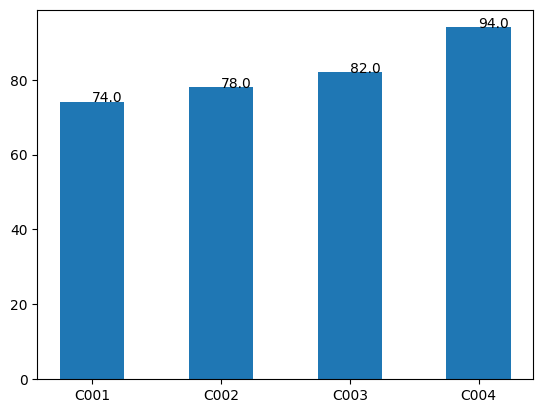

In [3]:
# 匯入套件(模組)
import matplotlib.pyplot as plt
import numpy as np

# group by 以後，進行查詢，並與 matplotlib 整合
sql = '''
SELECT `cId`, AVG(`score`) AS `avg_score`
FROM `scores`
GROUP BY `cId`
'''
df = pd.read_sql(sql, con=engine); df

# 繪製長條圖
plt.bar(df['cId'], df['avg_score'], width=0.5)

# 設定數值文字在圖表上
for i in df.index:
    plt.text(i, df['avg_score'][i], df['avg_score'][i])

# 顯示圖表
plt.show()